# Used Cars Analysis and Prediction

In [46]:
# Import Statements

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [47]:
df_v1 = pd.read_csv("cars.com.csv")

In [48]:
df_v1.head()

,NAME,MILES,LOCATION,DISTANCE,PRICE_USD,TYPE
0,2007 Hyundai Tiburon GS I4 Automatic,43296,"Port Richey, FL",27.0,4990,Coupe
1,2009 Nissan Altima 2.5 S Coupe CVT,81669,"Tampa, FL",9.0,6999,Coupe
2,2015 Scion tC Base Automatic,27035,"Seffner, FL",17.0,11994,Coupe
3,2011 Nissan Altima 2.5 S Coupe CVT,104808,"St. Petersburg, FL",16.0,6500,Coupe
4,2013 MINI Cooper Coupe Coupe,16878,"Palm Harbor, FL",15.0,12962,Coupe


In [49]:
# Extracting year of manufacturing from the name column
df_v1['YEAR'] = df_v1['NAME'].str[:4]

In [52]:
# Creating subtrings
df_v1['CNAME'] = df_v1['NAME'].str.split()

In [6]:
df_v1.shape

(23655, 8)

In [53]:
# Sperating manufacturing company from Name substrings
clist= []
for i in range(23655):
    clist.append(df_v1['CNAME'][i][1])
df_v1['COMPANY'] = clist

In [54]:
#drop column CNAME, creating version 2
df_v2 = df_v1.drop(['CNAME','NAME'],axis=1)

In [9]:
df_v2.head()

,MILES,LOCATION,DISTANCE,PRICE_USD,TYPE,YEAR,COMPANY
0,43296,"Port Richey, FL",27.0,4990,Coupe,2007,Hyundai
1,81669,"Tampa, FL",9.0,6999,Coupe,2009,Nissan
2,27035,"Seffner, FL",17.0,11994,Coupe,2015,Scion
3,104808,"St. Petersburg, FL",16.0,6500,Coupe,2011,Nissan
4,16878,"Palm Harbor, FL",15.0,12962,Coupe,2013,MINI


In [10]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23655 entries, 0 to 23654
Data columns (total 7 columns):
MILES        23655 non-null int64
LOCATION     23655 non-null object
DISTANCE     23652 non-null float64
PRICE_USD    23655 non-null int64
TYPE         23655 non-null object
YEAR         23655 non-null object
COMPANY      23655 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.3+ MB


Dropping 3 rows with missing values

In [55]:

df_v3 = df_v2.dropna()
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23652 entries, 0 to 23654
Data columns (total 7 columns):
MILES        23652 non-null int64
LOCATION     23652 non-null object
DISTANCE     23652 non-null float64
PRICE_USD    23652 non-null int64
TYPE         23652 non-null object
YEAR         23652 non-null object
COMPANY      23652 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 1.4+ MB


## Exploratory Data Analysis 

#### Our first hypothesis, miles driven is inversely correlated with price

Numerical Data : Miles

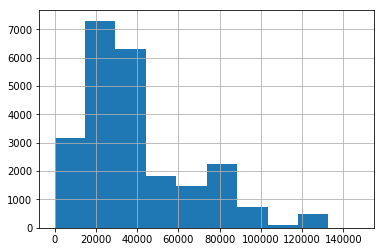

In [15]:
df_v3.MILES.hist() 

 Need to apply some transformation as data 'MILES' is not distributed normally

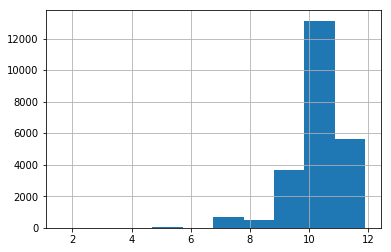

In [12]:
df_v3.MILES.apply(np.log).hist()

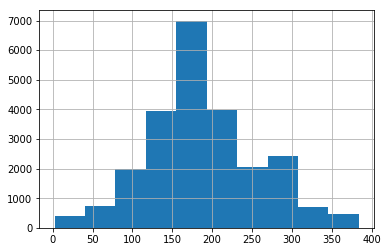

In [13]:
df_v2.MILES.apply(np.sqrt).hist() 

Best for OLS model, will apply this transformation when we finish our EDA.

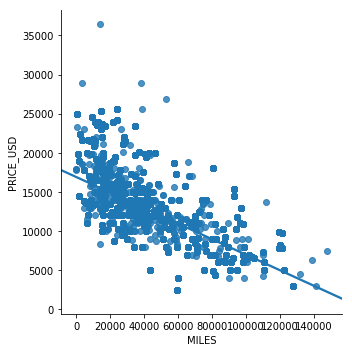

In [14]:
sns.lmplot(x = 'MILES', y= 'PRICE_USD',data = df_v3)

Categorical variables

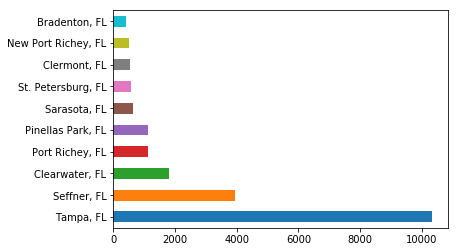

In [15]:
df_v3['LOCATION'].value_counts()[:10].plot(kind='barh') # Top 10 location of cars sold

In [16]:
df_v3['YEAR'].unique()

array(['2007', '2009', '2015', '2011', '2013', '2016', '2014', '2008',
       '2017', '2012', '2006', '2018', '2010', '2002', '2005', '2004'],
      dtype=object)

In [17]:
df_v3['COMPANY'].unique()

array(['Hyundai', 'Nissan', 'Scion', 'MINI', 'Honda', 'Mercedes-Benz',
       'Chevrolet', 'BMW', 'Chrysler', 'Kia', 'Mazda', 'Volkswagen',
       'Ford', 'Dodge', 'Subaru', 'Toyota', 'Lexus', 'Mitsubishi', 'Jeep',
       'Land', 'Buick', 'GMC', 'Ram', 'Suzuki', 'Audi', 'Jaguar', 'Volvo',
       'Pontiac', 'INFINITI', 'Cadillac'], dtype=object)

Creating a function to visualize The average price of each type of vehicle, for a given YEAR model

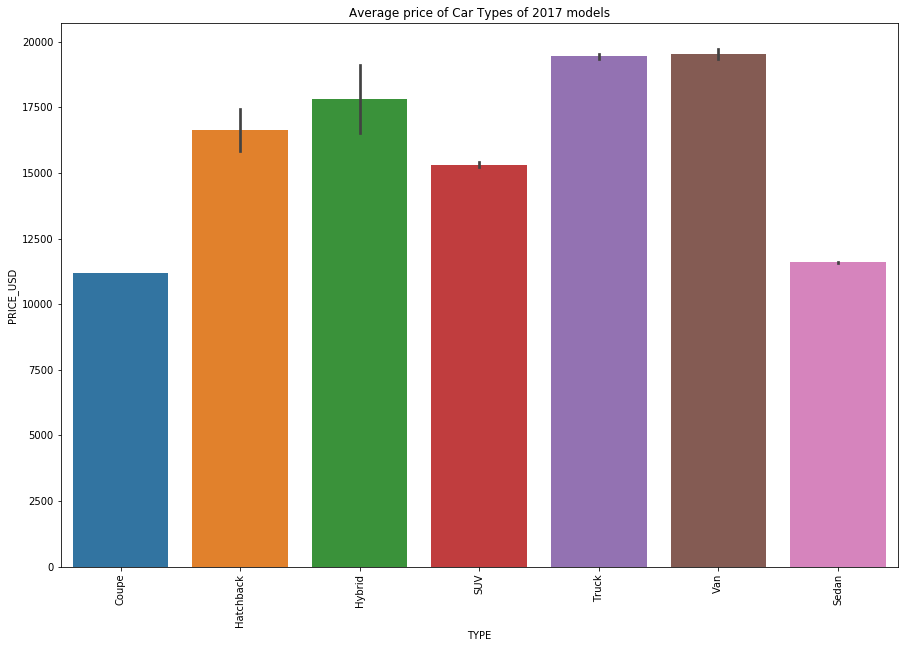

In [18]:

def filt_year(year):
    plt.figure(figsize=(15,10))
    plt.xticks(rotation=90)
    df_v3_filtered=df_v3[(df_v3.YEAR.astype('int') == year)  ]
    sns.barplot(data=df_v3_filtered,x="TYPE",y="PRICE_USD",orient="H").set_title("Average price of Car Types of " + str( year)+ " models" )
    
year = 2017
filt_year(year)

Creating a function to visualize The total number of vehicles for all companies for a given YEAR model

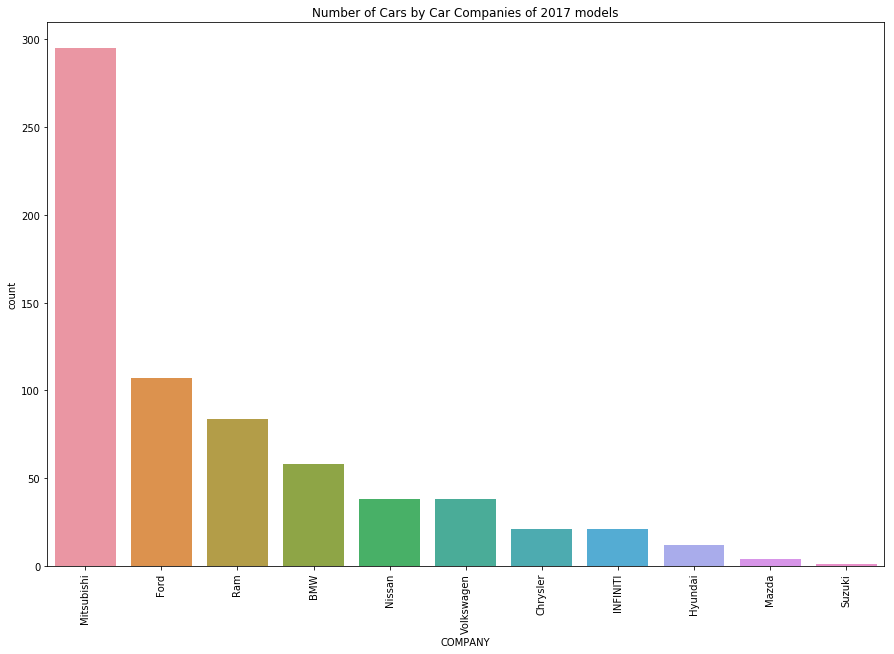

In [57]:
def filt_year1(year1):
    plt.figure(figsize=(15,10))
    plt.xticks(rotation=90)
    df_v3_filtered=df_v3[(df_v3.YEAR.astype('int') == year1)  ]
    sns.countplot(df_v3_filtered['COMPANY'],orient = "h", order = df_v3_filtered['COMPANY'].value_counts().index).set_title("Number of Cars by Car Companies of " + str( year)+ " models" )

year1 = 2011
filt_year1(year1)

## Data Preprocessing


Transforming the numeric variable 'MILES' and normalizing it.

In [58]:
df_v3.MILES =  df_v3.MILES.apply(np.sqrt)


In [59]:
df_v3.MILES.head()

0    208.076909
1    285.777886
2    164.423234
3    323.740637
4    129.915357
Name: MILES, dtype: float64

Creating dummy variables for categorical variables!

In [60]:
pd.get_dummies(df_v3).head().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Columns: 133 entries, MILES to COMPANY_Volvo
dtypes: float64(2), int64(1), uint8(130)
memory usage: 810.0 bytes


### 133 columns!!! Too many. Lets use auto-encoders.

In [61]:
df_v3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23652 entries, 0 to 23654
Data columns (total 7 columns):
MILES        23652 non-null float64
LOCATION     23652 non-null object
DISTANCE     23652 non-null float64
PRICE_USD    23652 non-null int64
TYPE         23652 non-null object
YEAR         23652 non-null object
COMPANY      23652 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 1.4+ MB


In [62]:
#import LabelEncoder
from sklearn.preprocessing import LabelEncoder
#convert column categories to numeric using Label Encoder
#Reference: http://pbpython.com/categorical-encoding.html
encoder = LabelEncoder()
df_v3["TYPE"] = encoder.fit_transform(df_v3["TYPE"])
df_v3["COMPANY"] = encoder.fit_transform(df_v3["COMPANY"])
df_v3["YEAR"] = encoder.fit_transform(df_v3["YEAR"])
df_v3["LOCATION"] = encoder.fit_transform(df_v3["LOCATION"])


In [63]:
df_v3.head()

,MILES,LOCATION,DISTANCE,PRICE_USD,TYPE,YEAR,COMPANY
0,208.076909,56,27.0,4990,1,4,10
1,285.777886,68,9.0,6999,1,6,21
2,164.423234,60,17.0,11994,1,12,24
3,323.740637,65,16.0,6500,1,8,21
4,129.915357,52,15.0,12962,1,10,17


## Machine Learning

In [64]:
df_v3['PRICE'] = df_v3.PRICE_USD


In [65]:
df_v3 = df_v3.drop(['PRICE_USD'],axis=1)

In [66]:
df_v3.head()

,MILES,LOCATION,DISTANCE,TYPE,YEAR,COMPANY,PRICE
0,208.076909,56,27.0,1,4,10,4990
1,285.777886,68,9.0,1,6,21,6999
2,164.423234,60,17.0,1,12,24,11994
3,323.740637,65,16.0,1,8,21,6500
4,129.915357,52,15.0,1,10,17,12962


Splitting into training and test data

In [67]:
from sklearn.cross_validation import train_test_split

X=df_v3.loc[:,"MILES":"COMPANY"]

Y = df_v3.loc[:,"PRICE"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [68]:
X_train.head()

,MILES,LOCATION,DISTANCE,TYPE,YEAR,COMPANY
12234,210.658491,68,3.0,6,10,7
9426,202.783135,60,17.0,4,12,4
22058,95.168272,68,3.0,5,15,10
16462,274.490437,68,2.0,5,3,3
4785,146.280552,68,3.0,4,15,20


## Linear Regression 

In [69]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

linear = Pipeline([
        ("scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])
linear.fit(X_train, Y_train)


from sklearn.model_selection import cross_val_score
print("R Square:" , cross_val_score(linear, X_train, Y_train, scoring='r2',cv=5))

scores_mse = cross_val_score(linear, X, Y, scoring="neg_mean_squared_error", cv=5)
        
rmse_scores = np.sqrt(-scores_mse)
#Print  RMSE Score
print("RMSE Scores:", rmse_scores)
print("Mean RMSE Score:" , rmse_scores.mean())

R Square: [0.53820087 0.49962063 0.52280353 0.5026074  0.52843256]
RMSE Scores: [2773.48972248 1738.0861511  3665.10560128 3939.11883279 3474.03194366]
Mean RMSE Score: 3117.966450263227


# Support Vector Regressor

In [70]:
from sklearn.svm import LinearSVR

svm_reg = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_reg", LinearSVR(epsilon = 1.5, C=5))
    ])
svm_reg.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(svm_reg, X_train, Y_train, scoring='r2',cv=5)

array([0.43646611, 0.36900046, 0.41516436, 0.39089019, 0.43734732])

Lets try increasing the C hyper paramter.

In [71]:
from sklearn.svm import LinearSVR

svm_reg = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_reg", LinearSVR(epsilon = 1.5, C=300))
    ])
svm_reg.fit(X_train, Y_train)

from sklearn.model_selection import cross_val_score
cross_val_score(svm_reg, X_train, Y_train, scoring='r2',cv=5)

array([0.52621623, 0.4776706 , 0.50122226, 0.48110829, 0.5078517 ])

## Random Forest Regressor

We'll train a random forest regressor and use Grid Search to optimize the hyperparameter values.

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV  

rf = RandomForestRegressor()
param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [10,12,14]
              , "min_samples_split" : [3,5]
              , "max_depth": [2,4,5,7]
              , "n_estimators": [10,100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=1) # Used K-Fold Cross Validation
gs = gs.fit(X_train, Y_train)



Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:  1.3min finished


In [39]:
cvres = gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(mean_score,params)

0.5825237371521347 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 10}
0.5785554466434254 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100}
0.5751352695937837 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 10}
0.5798723864301775 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 100}
0.5716204414250168 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 10}
0.5797783376590101 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 3, 'n_estimators': 100}
0.5738783402926805 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 10}
0.576493589389926 {'criterion': 'mse', 'max_depth': 2, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 100}
0.577

In [35]:
print(gs.best_score_)
print(gs.best_params_)

0.9544495537863249
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 100}


In [36]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, Y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_test, Y_test))


Score: 0.96


Accuracy of 96% !!! That's really good I feeel! But its definitely overfitting, so we need to change the list of values of hyperparameters accordingly.

In [37]:
predictions = forest.predict(X_test)

In [38]:
#Creating a Data frame to compare the Actual v/s predicted prices
df_results = pd.DataFrame({'Actual Price':Y_test, 'Predicted': predictions })
df_results.head()

,Actual Price,Predicted
23194,11988,12670.712560
22846,9000,8984.060909
19919,13777,13811.486686
15252,25591,25591.000000
17036,8994,9948.577217


So, lets not include the value 7 for max_depth, i.e 5 can be the highest value of max_depth.

In [39]:
 from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [10,12,14]
              , "min_samples_split" : [3,5]
              , "max_depth": [2,4,5]
              , "n_estimators": [10,100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=1, verbose=1) # Used K-Fold Cross Validation
gs = gs.fit(X_train, Y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   23.9s finished


In [40]:
print(gs.best_score_)
print(gs.best_params_)

0.865264494203518
{'criterion': 'mse', 'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 5, 'n_estimators': 10}


In [41]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(X_train, Y_train)
# Explained variance score: 1 is perfect prediction
print('Score: %.2f' % forest.score(X_test, Y_test))

Score: 0.86


We have regularized our model and the accuracy is 87. This model will generalize better 

In [42]:
predictions = forest.predict(X_test)

In [43]:
#Creating a Data frame to compare the Actual v/s predicted prices
df_results = pd.DataFrame({'Actual Price':Y_test, 'Predicted': predictions })
df_results.head()

,Actual Price,Predicted
23194,11988,12641.152276
22846,9000,9002.383387
19919,13777,15397.800935
15252,25591,23945.824439
17036,8994,11399.546815


1. YEAR (0.371925)
2. TYPE (0.283819)
3. MILES (0.230560)
4. LOCATION (0.076531)
5. COMPANY (0.032110)
6. DISTANCE (0.005055)


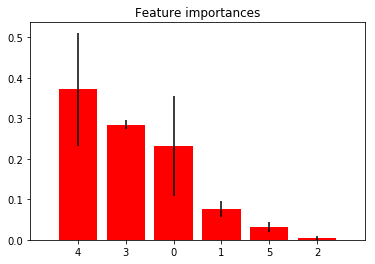

In [44]:
#Code in this cell has been referred from link https://www.kaggle.com/ddmngml/trying-to-predict-used-car-value
#storing feature importances in a variable
feature_importances = forest.feature_importances_

#sorting importances
indices = np.argsort(feature_importances)[::-1]

#calculating standard deviation of feature importances
std = np.std([f.feature_importances_ for f in forest.estimators_],
             axis=0)  

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns.values[indices[f]], feature_importances[indices[f]]))

# Plot the feature importances of the forest regressor
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feature_importances[indices],
       color="r", yerr=std[indices], align="center",tick_label = X_train.columns.values)
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### We can see that YEAR, TYPE and MILES travelled were the most important features in our model to predict the Price of the car! This should be taken into consideration when choosing a good deal! 